In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

import scipy.stats as sps

# Load the data into data frames
df = pd.read_csv("QM_data.csv")

In [2]:
# The dataset shows house prices and crime rates in 31 areas of London in 2011.

# Let's visualise the first few rows of each data set:

df.head()

,Area,House_prices_2011,Burglary_rate,Criminal_damage_rate,Drugs_rate,Fraud_or_Forgery_rate,Other_Notifiable_Offences_rate,Robbery_rate,Sexual_offences_rate,Theft_and_Handling_rate,Violence_Against_the_Person_rate
0,Barking and Dagenham,0.170,0.0127,0.0118,0.0054,0.0061,0.0019,0.0057,0.0014,0.0337,0.0220
1,Barnet,0.324,0.0138,0.0070,0.0035,0.0044,0.0008,0.0033,0.0009,0.0284,0.0119
2,Bexley,0.215,0.0064,0.0075,0.0041,0.0028,0.0007,0.0016,0.0007,0.0172,0.0120
3,Brent,0.300,0.0121,0.0077,0.0149,0.0041,0.0015,0.0071,0.0012,0.0281,0.0235
4,Bromley,0.275,0.0103,0.0087,0.0035,0.0046,0.0007,0.0024,0.0008,0.0255,0.0151


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Area                              31 non-null     object 
 1   House_prices_2011                 31 non-null     float64
 2   Burglary_rate                     31 non-null     float64
 3   Criminal_damage_rate              31 non-null     float64
 4   Drugs_rate                        31 non-null     float64
 5   Fraud_or_Forgery_rate             31 non-null     float64
 6   Other_Notifiable_Offences_rate    31 non-null     float64
 7   Robbery_rate                      31 non-null     float64
 8   Sexual_offences_rate              31 non-null     float64
 9   Theft_and_Handling_rate           31 non-null     float64
 10  Violence_Against_the_Person_rate  31 non-null     float64
dtypes: float64(10), object(1)
memory usage: 2.8+ KB


In [28]:
df = df.rename(columns = {'House_prices_2011':'house_price',
                          'Burglary_rate':"burglary",
                          'Criminal_damage_rate':'criminal',
                          'Drugs_rate':'drugs',
                          'Fraud_or_Forgery_rate':'fraud_forgery',
                          'Other_Notifiable_Offences_rate':'other_offences',
                          'Robbery_rate':"robbery",
                          'Sexual_offences_rate':'sexual',
                          'Theft_and_Handling_rate':'theft',
                          'Violence_Against_the_Person_rate':'violence'})

In [29]:
#Checking the correlation between variables
print(df.corr('spearman'))

                house_price  burglary  criminal     drugs  fraud_forgery  \
house_price        1.000000  0.214682 -0.163550  0.306838      -0.128472   
burglary           0.214682  1.000000  0.330404  0.301978       0.252826   
criminal          -0.163550  0.330404  1.000000  0.459992       0.385937   
drugs              0.306838  0.301978  0.459992  1.000000       0.425500   
fraud_forgery     -0.128472  0.252826  0.385937  0.425500       1.000000   
other_offences     0.111258  0.292565  0.649216  0.735103       0.528282   
robbery            0.128472  0.430763  0.507476  0.749748       0.427418   
sexual             0.181359  0.164183  0.673953  0.728723       0.348325   
theft              0.460630  0.345405  0.443704  0.770457       0.389567   
violence           0.198486  0.337066  0.678550  0.823512       0.424117   

                other_offences   robbery    sexual     theft  violence  
house_price           0.111258  0.128472  0.181359  0.460630  0.198486  
burglary         

Text(0.5, 1.0, 'Correlation Matrix')

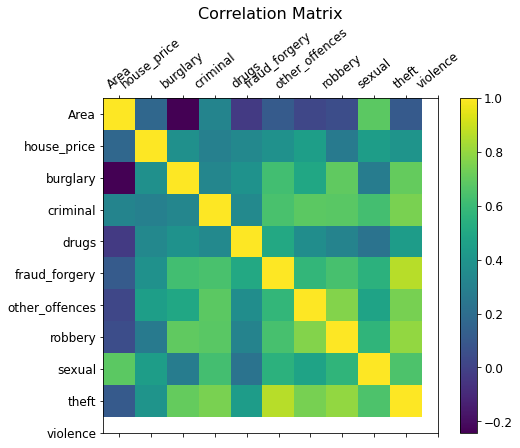

In [30]:
#In regression, collinearity is the problem when two variables are highly correlated and therefore contain similar information about the variance within the dataset. 
#Colinearity among variables can be detected by creating a correlation matrix.
#multicollinearity emerges when three or more variables, which are highly correlated, are included in a model. It can emerge even when each pair of variables involved are not colinear.
#Check the colinearity between variables using a correlation matrix as below

plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(8, 6))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=39)
plt.yticks(range(df.shape[1]), df.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=16)

In [ ]:
#It looks like some variables' correlation is above 0.75, they may highly related. 
#However, we cannot remove them directly.

In [6]:
#Dealing with multicollinearity
#Using VIF to deal with multicollinearity
#If there are a large number of predictor variables, it is very difficult to manually test multicollinearity between them. 
#Here we use VIF to automatically deal with multicollinearity.
#The Variance Inflation Factor (VIF) is a measure of multicolinearity among predictors within a multiple regression task. 

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    while True:
        df_with_const = add_constant(df)
        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()
        vif_df = vif_df.drop('const') 
        if vif_df.VIF.max() > thresh:
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            break
    return df

In [27]:
df_new = drop_column_using_vif_(df.drop('Area', axis=1))

Dropping: violence
Dropping: sexual


In [8]:
# This package will allow for multilinear regression. It can also be used for simple linear regression.

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [11]:
multi_regression_model = smf.ols(formula='house_price ~ burglary + criminal + drugs + fraud_forgery + other_offences + robbery + theft',data=df).fit()

print(multi_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:            house_price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     8.277
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           4.68e-05
Time:                        14:39:27   Log-Likelihood:                 42.866
No. Observations:                  31   AIC:                            -69.73
Df Residuals:                      23   BIC:                            -58.26
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3599      0.108      3.

In [12]:
# Pick out some values of interest and print the regression equation:

beta_0, beta_1, beta_2, beta_3, beta_4, beta_5, beta_6, beta_7 = multi_regression_model.params
rsq                    = multi_regression_model.rsquared
pval_0, pval_1, pval_2, pval_3, pval_4, pval_5, pval_6, pval_7 = multi_regression_model.pvalues

print("y =", round(beta_1,3), "x1 +", round(beta_2,3), "x2 +", round(beta_0,3), "x3 +", round(beta_3, 3), "x4 +", round(beta_4, 3), "x5 +", round(beta_5, 3), "x6 +", round(beta_6, 3), "x7 +", round(beta_7, 3))
print("R^2     = ", rsq)
print("p-value_1 = ", round(pval_1,3))
print("p-value_2 = ", round(pval_2,3))
print("p-value_3 = ", round(pval_3,3))
print("p-value_4 = ", round(pval_4,3))
print("p-value_5 = ", round(pval_5,3))
print("p-value_6 = ", round(pval_6,3))
print("p-value_7 = ", round(pval_7,3))


y = 2.237 x1 + -28.271 x2 + 0.36 x3 + 3.971 x4 + -0.589 x5 + -22.681 x6 + -14.049 x7 + 6.511
R^2     =  0.7158326121554923
p-value_1 =  0.788
p-value_2 =  0.032
p-value_3 =  0.553
p-value_4 =  0.966
p-value_5 =  0.653
p-value_6 =  0.134
p-value_7 =  0.0


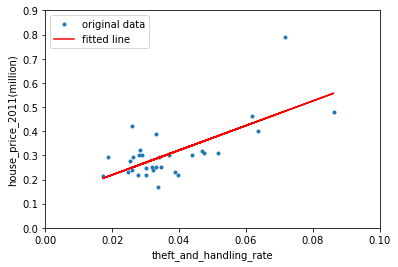

y = 5.107 x + 0.117
Rsq =  0.4733673242909561
p-value =  1.891498807869346e-05


In [26]:
# This is a linear regression of house_price_2011 against theft_and_handing_rate

X = df['theft']
Y = df['house_price']

plt.xlabel('theft_and_handling_rate')
plt.ylabel('house_price_2011(million)')

a = plt.plot(X,Y,'.', label='original data')
plt.xlim(0,0.1)
plt.ylim(0,0.9)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.

plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)